_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [68]:
## Response [200] means that everything went okay with the retrieval of information
result

<Response [200]>

In [69]:
## what is the type of the information.. in this case, object
type(result)

requests.models.Response

In [70]:
## returns HTML code. the text from the URL
result.text

'<!doctype html>\n<html>\n<head>\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Talks | PyCon 2019 in Cleveland, Ohio</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet">\n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/slight.673caeca693d.css"/>\n    \n\n\n<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" />\n<link rel="stylesheet" type="text/css" href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" />\n\n    \n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/simple-grid.d1149de00d41.css"/>\n\n\n\n    <meta property="og:image" content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" />\n    <link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon" />\n    

In [71]:
type(result.text)

str

In [72]:
## bs4.beautifulsoup function helps organize this str 
soup = bs4.BeautifulSoup(result.text)
soup

<!DOCTYPE html>
<html>
<head>
<title>Talks | PyCon 2019 in Cleveland, Ohio</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet"/>
<link href="/2019/site_media/static/css/slight.673caeca693d.css" media="all" rel="stylesheet" type="text/css"/>
<link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
<link href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" rel="stylesheet" type="text/css"/>
<link href="/2019/site_media/static/css/simple-grid.d1149de00d41.css" media="all" rel="stylesheet" type="text/css"/>
<meta content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" property="og:image"/>
<link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon"/>
<script src="//ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js"></script>
<script>
  

In [73]:
## beautiful soup object
type(soup)

bs4.BeautifulSoup

In [74]:
## tab to get info.. select finds certain elements. One can inspect source from web pages and look for clues for the 
##information that you want. trial and error until you get what you want!
soup.select('h2') ## select all h2 tags on the page

[<h2>
 <a href="/2019/schedule/presentation/235/" id="presentation-235">
         5 Steps to Build Python Native GUI Widgets for BeeWare
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/196/" id="presentation-196">
         8 things that happen at the dot:  Attribute Access &amp; Descriptors
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/210/" id="presentation-210">
         Account Security Patterns: How Logged-In Are you?
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/240/" id="presentation-240">
         Ace Your Technical Interview Using Python
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/161/" id="presentation-161">
         Advanced asyncio: Solving Real-world Production Problems
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/230/" id="presentation-230">
         A Guide to Software Engineering for Visually Impaired
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/157/" id="presentation-

In [75]:
type(soup.select('h2')) ## returns a list! 

list

In [76]:
len(soup.select('h2')) ## tells you the length of the list.. about 100 talks in this case!

95

In [77]:
first = soup.select('h2')[0] ## return the first element
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [78]:
type(first)  ## soup tag element

bs4.element.Tag

In [79]:
## keep tab completing to see what you can do for these different types of items
first.text ## get the text from the bs4 Tag object! .. text with spaces and newline characters

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [80]:
type(first.text) # another string

str

In [81]:
first.text.strip() ## strip the blank spaces

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [82]:
first.text.strip().strip('5') ## strips specific text

' Steps to Build Python Native GUI Widgets for BeeWare'

In [83]:
last = soup.select('h2')[-1] ## select the last element
last

<h2>
<a href="/2019/schedule/presentation/191/" id="presentation-191">
        Working with Time Zones: Everything You Wish You Didn't Need to Know
      </a>
</h2>

In [84]:
#loop through all the text and print the titles with spaces removed!
titles = []
for tag in soup.select('h2'):
  title = tag.text.strip()
  titles.append(title)
  
print(titles)  ## a list!
type(titles)

titlesCompr = [tag.text.strip() for tag in soup.select('h2')]  ## list comprehensions! same as 'titles' list above

print(titlesCompr)

['5 Steps to Build Python Native GUI Widgets for BeeWare', '8 things that happen at the dot:  Attribute Access & Descriptors', 'Account Security Patterns: How Logged-In Are you?', 'Ace Your Technical Interview Using Python', 'Advanced asyncio: Solving Real-world Production Problems', 'A Guide to Software Engineering for Visually Impaired', 'A Medieval DSL? Parsing Heraldic Blazons with Python!', 'A New Era in Python Governance', 'API Evolution the Right Way', 'A Right Stitch-up: Creating embroidery patterns with Pillow', 'A Snake in the Bits: Security Automation with Python', 'Assets in Django without losing your hair', 'Attracting the Invisible Contributors', 'Beyond Two Groups: Generalized Bayesian A/B[/C/D/E...] Testing', 'Break the Cycle: Three excellent Python tools to automate repetitive tasks', 'Building a Culture of Observability', 'Building an Open Source Artificial Pancreas', 'Building reproducible Python applications for secured environments', 'But, Why is the (Django) Admin

In [85]:
titlesCompr[0], titlesCompr[-1] ## first and last titles! can iterate the list!

('5 Steps to Build Python Native GUI Widgets for BeeWare',
 "Working with Time Zones: Everything You Wish You Didn't Need to Know")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [86]:
## for loop
for title in titles:
  if len(title) > 80:
    print(title)
    



¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
How to engage Python contributors in the long term? Tech is easy, people are hard.
Lessons learned from building a community of Python users among thousands of analysts
Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting
One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.
Put down the deep learning: When not to use neural networks and what to do instead
Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


### 2. List Comprehension

In [87]:
long_titles = [title for title in titles if len(title) > 80]  # list comprehension

long_titles


['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [88]:
## function that returns true or false if title is long or not

def long(title):
  return len(title) > 80

long("Python is good")

False

In [89]:
## filters for long titles (using long function).. list call to it returns it into a list
## functional style of programming

list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [90]:
## another way to do the same thing as before. 'Lambdas are like list comprehensions for functions'

list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [91]:
import pandas as pd
pd.options.display.max_colwidth = 200 ## shows full title so it doesn't get truncated


df = pd.DataFrame({'title': titles})  # craete datafram using data from previous list!

df.shape

(95, 1)

In [92]:
df[ df['title'].str.len() > 80]  ## refer to pandas cheat sheet to see what is going on here!

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
## adding column that shows the title lengths

df['title_length'] = df['title'].apply(len)

In [94]:
df.loc[df['title_length']>80, 'title_length']  ## returns titles with length greater than 80

30    89
38    81
43    82
48    85
50    82
60    95
66    82
84    90
Name: title_length, dtype: int64

### long title

In [0]:
## boolean column.. if short then false, if long, then True
df['long_title'] = df['title_length'] > 80

In [96]:
df.shape

(95, 3)

In [97]:
df[df['long_title']] ## return ones with long titles only

,title,title_length,long_title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


### first letter

In [0]:
df['first_letter'] = df['title'].str[0]  ## add column of first letters

In [99]:
df[df['first_letter']=='P']  ## show rows where first letter is 'P'

,title,title_length,long_title,first_letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [100]:
## same as..  '.startswith('P')' .. python methods.. very convenient!
df[df['title'].str.startswith('P')]  ## keep in mind.. strings put in are case sensitive... .lower() or .upper() can be used

## other methods.. .contains('string') 

,title,title_length,long_title,first_letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [101]:
!pip install textstat

In [0]:
## stats on text information
import textstat


In [0]:
## tab complete to look at methods! always helpful
## textstat.

In [104]:
df['title_word_count'] = df['title'].apply(textstat.lexicon_count)
df.shape

(95, 5)

In [105]:
df.head()

,title,title_length,long_title,first_letter,title_word_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [106]:
df[df['title_word_count'] <= 3]  # look at short word count names

,title,title_length,long_title,first_letter,title_word_count
56,Measuring Model Fairness,24,False,M,3
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
## rename. .make sure to reassign to original (or new) dataframe, dependind if you want
## to keep them separated or not
df = df.rename(columns={'title_length': 'title_character_count'})

In [108]:
df.head()  ## you can see that the column got renamed

,title,title_character_count,long_title,first_letter,title_word_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [109]:
df.describe()  ## will only show numeric columns

,title_character_count,title_word_count
count,95.000000,95.000000
mean,51.347368,7.978947
std,17.729509,3.218890
min,20.000000,2.000000
25%,37.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


In [110]:
df.describe(exclude='number') ## includes all columns.. but probably won't be great for some of the stats

,title,long_title,first_letter
count,95,95,95
unique,95,2,22
top,"How to engage Python contributors in the long term? Tech is easy, people are hard.",False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [111]:
df.sort_values(by='title_character_count').head()['title']

64        Practical decorators
68       Python Security Tools
89     Type hinting (and mypy)
82     The Zen of Python Teams
56    Measuring Model Fairness
Name: title, dtype: object

Titles sorted reverse alphabetically

In [112]:
df.sort_values(by='first_letter', ascending=False).head() ## be aware of details of functions.. might not return because of style

,title,title_character_count,long_title,first_letter,title_word_count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [113]:
df['first_letter'].value_counts()

T    12
A    11
M     8
P     8
E     7
B     6
S     6
H     5
G     4
L     4
W     4
D     4
F     3
C     3
I     2
R     2
O     1
U     1
t     1
¡     1
8     1
5     1
Name: first_letter, dtype: int64

Percentage of talks with long titles

In [114]:
df['long_title'].value_counts() / 95  # manual way to get percentage.. divide by length of dataframe

False    0.915789
True     0.084211
Name: long_title, dtype: float64

In [115]:
df['long_title'].value_counts(normalize=True)  # parameter that gives percentages

False    0.915789
True     0.084211
Name: long_title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

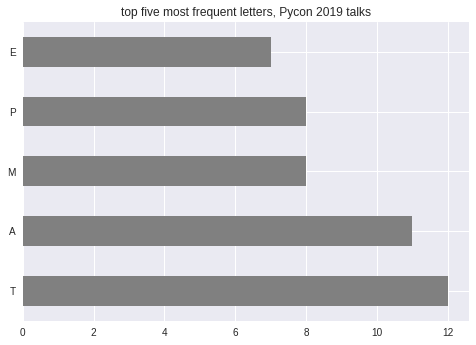

In [116]:
## parentheses around everything allows to put chain on different lines
(df['first_letter']
 .value_counts()
 .head()
.plot
.barh(color='grey',
     title='top five most frequent letters, Pycon 2019 talks'))  # horizontal plot for top five letter counts 

Histogram of title lengths, in characters

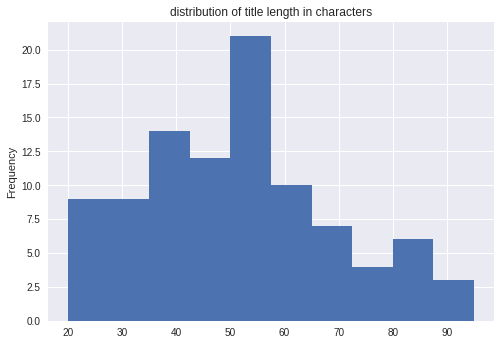

In [117]:
# histogram.. with title added to it.. of distribution of character counts

title = "distribution of title length in characters"
df['title_character_count'].plot.hist(title=title)

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [0]:
soup.select('.presentation-description')  ## selecting data that is within the '.presentation-description' tags

In [0]:
descriptions = [tag.text.strip() for tag in soup.select('.presentation-description')]  ## putting the stripped descriptions into a list


In [121]:
df_copy = df                           ## making a copy of the dataframe
df_copy['descriptions'] = descriptions ## making a column named 'descriptions' consisiting of the talk descriptions
df_copy.head()                         ## show the new data frame with the added column

,title,title_character_count,long_title,first_letter,title_word_count,descriptions
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe..."
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ..."
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa..."
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat..."


In [122]:
## adding a column that shows the character count of the descriptions
df_copy['description_character_count'] = df_copy['descriptions'].apply(len)  
df_copy.head()

,title,title_character_count,long_title,first_letter,title_word_count,descriptions,title_length,description_character_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",54,766
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",64,296
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",49,426
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,41,507
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",56,647


In [123]:
## adding a column with description word counts using 'textstat' library
df_copy['descriptions_word_count'] = df_copy['descriptions'].apply(textstat.lexicon_count)
df_copy.head()


,title,title_character_count,long_title,first_letter,title_word_count,descriptions,title_length,description_character_count,descriptions_word_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",54,766,135
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",64,296,56
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",49,426,66
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,41,507,84
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",56,647,96


In [124]:
## Describe all the dataframe's columns. What's the average description word count? The minimum? The maximum?
df_copy.describe()

,title_character_count,title_word_count,title_length,description_character_count,descriptions_word_count
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,51.347368,7.978947,51.347368,813.073684,130.821053
std,17.729509,3.218890,17.729509,415.988191,64.357872
min,20.000000,2.000000,20.000000,121.000000,20.000000
25%,37.000000,6.000000,37.000000,542.500000,85.500000
50%,52.000000,7.000000,52.000000,718.000000,116.000000
75%,62.000000,9.500000,62.000000,1016.500000,165.000000
max,95.000000,19.000000,95.000000,2827.000000,421.000000


1. **Average descriptions word count**: 130.82 words
2. **Minimum descriptions word count**: 20 words
3. **Maximum descriptions word count**: 421 words

In [126]:
## Answer the question: Which descriptions could fit in a tweet? - Twitter current limit is 280 characters
df_copy[df_copy['description_character_count'] <= 280]

,title,title_character_count,long_title,first_letter,title_word_count,descriptions,title_length,description_character_count,descriptions_word_count
54,"Making Music with Python, SuperCollider and FoxDot",50,False,M,7,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",50,121,20


Only 1 description would fit in a tweet - "Making Music with Pythin, SuperCollider and FoxDot"